# Contents
1. [Biomechanical features of orthopedic patients](#1)
2. [Avocado Prices Datasets](#2)
3. [Evoluation Regression Models](#3)
4. [Cheat-Sheet](#4)
5. [Logistic Regression](#5)
6. [K-Nearest Neighbour (KNN) Classification](#6)
7. [Support Vector Mechine (SVM) Classification](#7)
8. [Naive Bayes Classification](#8)
9. [Decision Tree Classification](#9)
10. [Random Forest Classification](#10)



In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
data = pd.read_csv("/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv")
column_3C_weka = pd.read_csv("/kaggle/input/biomechanical-features-of-orthopedic-patients/column_3C_weka.csv")

There are features predictor and target variable. Features are like pelvic_incidence, pelvic_tilt numeric, lumbar_lordosis_angle etc are predictor and class feature is target variable.

In python there are some ML libraries like sklearn, keras or tensorflow. We will use sklearn.

<a is = "1"></a><br>
# Biomechanical features of orthopedic patients 

### EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
data.head()

In [ ]:
data.info()

Target variable is object. This means it is string.

In [ ]:
data.describe()

## Visualization

### scatter_matrix
> We will create a scatterplot matrix of several different variables so that we can determine whether there are any relationships among the variables in the dataset.

> * green : normal and red : abnormal
> * c: color
> * figsize: figure size
> * diagonal : histogram of each features
> * alpha : opacity of the image
> * s : size of our marker
> * marker : marker type

In [ ]:
data.loc[:,'class']  # data['class'] ayni sonucu verir

In [ ]:
data.loc[:,data.columns !=  'class' ].head()

In [ ]:
color_list = ['red' if i == 'Abnormal' else 'green' for i in data['class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                           c = color_list,
                           figsize = [15,15],
                           diagonal = 'hist',
                           alpha=0.5,s = 200,
                           marker = '@',
                           edgecolor= "orange")
plt.show()

There are relations between each feature. How many normal(green) and abnormal(red) classes are there?

Searborn library has countplot() that counts number of classes. #Also you can print it with value_counts() method

data.class.value_counts()

In [ ]:
data['class'].value_counts()

In [ ]:
sns.countplot('class', data=data)
plt.show()

## Regression

* Supervised learning
* We will learn linear and logistic regressions
* This orthopedic patients data is not proper for regression so I only use two features that are sacral_slope and pelvic_incidence of abnormal
* I consider feature is pelvic_incidence and target is sacral_slope
* Lets look at scatter plot to understand it better
* reshape(-1,1): If you do not use it shape of x or y becaomes (210,) and we cannot use it in sklearn, so we use shape(-1,1) and shape of x or y be (210, 1).

In [ ]:
data.columns

In [ ]:
data[['pelvic_incidence','sacral_slope']]

In [ ]:
data1 = data[data['class'] == 'Abnormal']
x = np.array(data1.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(data1.loc[:,'sacral_slope']).reshape(-1,1)
plt.figure(figsize=[6,6])
plt.scatter(x=x,y=y)
plt.xlabel('elvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

### Linear Regression
* y = b0 + b1.x
* b0 is the y value when x = 0 and b1 is the angle of the line.
* Mean Square Error should be minumum (MSE)
* residual = y-y_head
* MSE = sum(residual^2)/n

In [ ]:
# import sklearn libary
from sklearn.linear_model import LinearRegression

# Linear Reggression model
reg = LinearRegression()

# Predict space   
predict_space = np.linspace(min(x),max(x)).reshape(-1,1)    # X values

# Fit Line
reg.fit(x,y)

predicted = reg.predict(predict_space)

# R^2
print('R^2 score: ',reg.score(x, y))

# Plot regression line and scatter
plt.plot(predict_space,predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

In [ ]:
reg.predict([[ 1126.14792141]])

<a is = "2"></a><br>
# Avocado Prices Dataset

#### EXPLORATORY DATA ANALYSIS (EDA)
* We will analys Avocado Prioces datasets

In [ ]:
avocado = pd.read_csv("../input/avocado-prices/avocado.csv")

In [ ]:
avocado.head()

In [ ]:
avocado.info()

In [ ]:
avocado.corr(method ='kendall')

* "Unnamed:0" column is not going to be used. So we are going to drop this column as below.
* inplace= True parameter is used for writing this change into Dataset directly.

In [ ]:
avocado.drop("Unnamed: 0", axis = 1, inplace=True)

In [ ]:
# Visualize with seaborn library
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(avocado.corr(method ='kendall'), annot=True, linewidths=.5, fmt= '.1f',cmap="YlGnBu", ax=ax, cbar_kws={"orientation": "vertical"})
plt.show()

In [ ]:
# Years vs Average Price
bdata = avocado[["year","AveragePrice"]].groupby(["year"],as_index =False).mean().sort_values(by="year", ascending = True)
plt.figure(figsize=(9,3))
plt.bar(bdata["year"].values, bdata["AveragePrice"].values)
plt.xticks(bdata["year"].values)
plt.title("AveragePrice per Years")
plt.show()

## Linear Regression
* linear regression =  y = b0 + b1*x
* multiple linear regression   y = b0 + b1*x1 + b2*x2

In [ ]:
# %% linear regression
x = avocado.loc[:,"Total Volume"].values.reshape(-1,1)
y = avocado.loc[:,"AveragePrice"].values.reshape(-1,1)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y)

#predict
predict_space = np.linspace(min(x),max(x)).reshape(-1,1)
predicted = lr.predict(predict_space)
y_head = lr.predict(x)


plt.scatter(x=x,y=y_head)
plt.plot(predict_space ,predicted ,color="red",label ="linear")
plt.xlabel('Total Volume')
plt.ylabel('AveragePrice')
plt.show()

In [ ]:
# Predicts
print(lr.predict([[1000]]))

## Polynomial Linear Regression
* y =b0 + b1.x + b2.x^2 + ...+bn.x^n  # single x feature

In [ ]:
# x = Total Volume, y = AveragePrice

## Polynomial Linear Regression with 2nd degree
# y =b0 + b1.x + b2.x^2
x = avocado.loc[:,"Total Volume"].values.reshape(-1,1)
y = avocado.loc[:,"AveragePrice"].values.reshape(-1,1)


from sklearn.preprocessing import PolynomialFeatures
polynomial_regression = PolynomialFeatures(degree = 2)
x_polynomial = polynomial_regression.fit_transform(x)

# Line fit
linear_regression2 = LinearRegression()
linear_regression2.fit(x_polynomial,y)

# Visualization
y_head = linear_regression2.predict(x_polynomial)

plt.plot(x,y_head,color= "green",label = "Polynomial")
plt.scatter(x=x,y=y)
plt.xlabel('Total Volume')
plt.ylabel('AveragePrice') 
plt.legend()
plt.show()

## Multiple Linear Regression
* y = b0 + b1*x1 + b2*x2  # multiple x feature

In [ ]:
multidata = avocado[['Total Volume','4046','4225','4770','AveragePrice']]

In [ ]:
multidata.head()

In [ ]:
y = multidata["AveragePrice"].values.reshape(-1,1)
x = multidata.iloc[:,[0,1,2,3]]    # x are "Total Volume","4046", "4225", "4770"

multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(x,y)

y_head = multiple_linear_regression.predict(x)
plt.plot(x,y_head)
plt.legend()
plt.xlabel('Total Volume, 4046, 4225, 4770')
plt.ylabel('AveragePrice')
plt.show()

print("b0: ", multiple_linear_regression.intercept_)
print("b1,b2, b2, b3 : ",multiple_linear_regression.coef_)

In [ ]:
multiple_linear_regression.predict([[6.423662, 1.036740, 5.445485, 4.81600]])

# Decision Tree Regression
* CART : Clasification and Regression Tree

In [ ]:
x = multidata.iloc[:,[0]].values.reshape(-1,1)
y = multidata.iloc[:,[4]].values.ravel()

from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regression
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x,y)

# Predict
y_ = tree_reg.predict(x)

# Visualization
plt.scatter(x,y,color="red")
plt.plot(x,y_,color="black")
plt.xlabel("Total Avocado Volume")
plt.ylabel("Avarage Price")
plt.show()



In [ ]:
tree_reg.predict([[14.3]])

### Evoluation of Decision Tree

In [ ]:
from sklearn.metrics import r2_score
print("r_score: ", r2_score(y,y_))

# Random Forest Regression

In [ ]:
x = multidata.iloc[:,0].values.reshape(-1,1)
y = multidata.iloc[:,4].values.ravel()

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42) 

# n_estimators = number of tree, how many tree we we are going to use.
rf.fit(x,y)
y_head = rf.predict(x)

#Predict
rf.predict([[1154876.98]])

# Visualize
plt.scatter(x,y,color = "red")
plt.plot(x,y_head,color = "blue")
plt.xlabel("Total Avocado Volume")
plt.ylabel("Avarage Price")
plt.show()


### Evoluation of Random Forest Regression

In [ ]:

# Random Forest Algoristmasi r-score hesaplama

from sklearn.metrics import r2_score
print("r_score: ", r2_score(y,y_head))

<a is = "3"></a><br>
# Evoluation of Regression Models

### Evoluation od Decision Tree
r_score:  0.9987758391982751

### Evoluation of Random Forest Regression
r_score:  0.8720635845642947

For our dataset Decison Tree give more accurate accurancy score.



<a is = "4"></a><br>
## Cheat-Sheat
#### Below three commands given as example and returns the same output and can be used to perepare your data.
* data1.loc[:,'pelvic_incidence'].values
* np.array(data1.loc[:,'pelvic_incidence'])
* data1["pelvic_incidence"].values

#### You can select which columns to include in your data. Below will shows the columns 0,2 and 3.
* x = multidata.iloc[:,[0,2,3]]

<a is = "5"></a><br>
# Logistic Regression


* Logistic regression is actually a very simple neural network.
* logistic regression comes to mind first when we have binary output like 0 or 1.

## Computition Graph of a Logistic Regression


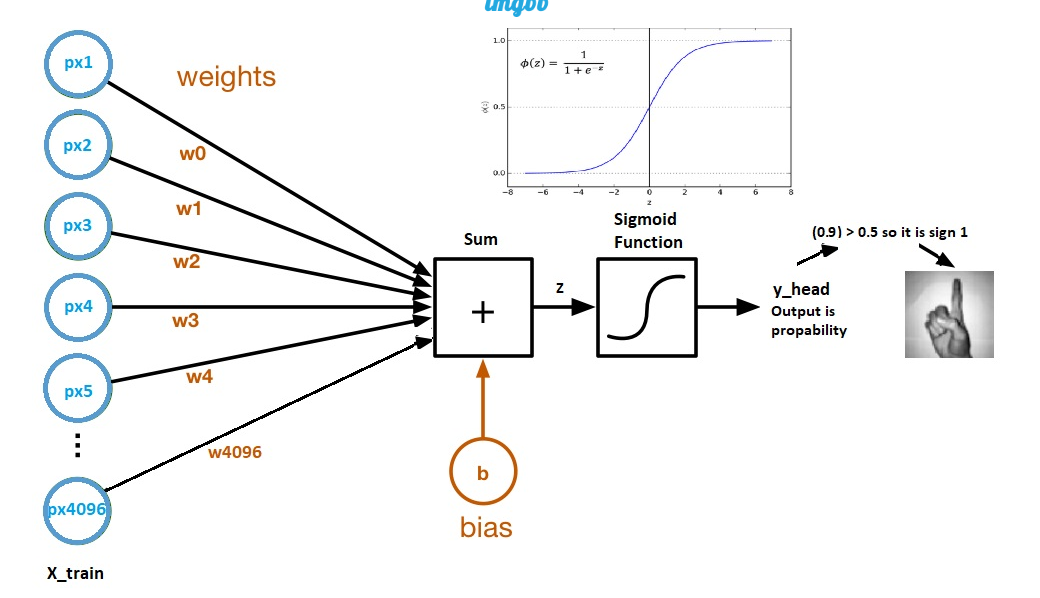

* z = b + px1w1 + px2w2 + ... + px4096*w4096
* y_head = sigmoid(z)

## Forward Propagation

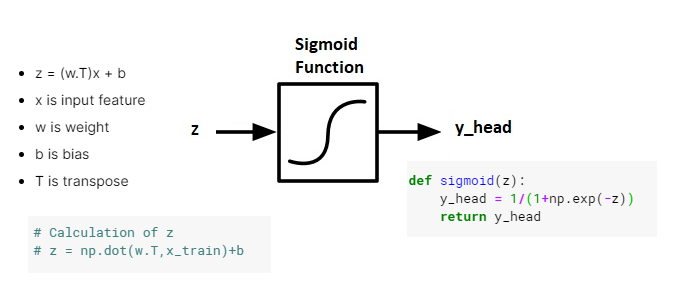

## Loss (Error) Function

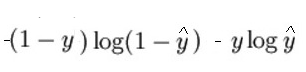

* Forward propagation steps:
* find z = w.T*x+b
* y_head = sigmoid(z)
* loss(error) = loss(y,y_head)
* cost = sum(loss)


# Logistic Regression with Sklearn

## Loading Dataset
* We are going to use sign language dataset.
* In this dataset lines between 0 - 204 shows 3 and lines between 1236 to 1442 shows number 4.

In [ ]:
x_l = np.load('/kaggle/input/sign-language-digits-dataset/X.npy')
Y_l = np.load('/kaggle/input/sign-language-digits-dataset/Y.npy')
# 0 - 204 are the numbers equal to 3
# 1236 - 1442 are the numbers equal to 4
plt.imshow(x_l[1237])
plt.show()


* In the dataset, sign three is between indexes 0 and 204. Number of three signs are 205.
* Also sign four is between indexes 1236 and 1442. Number of four signs are 206. Therefore, we will use 205 samples from each classes(labels).
* In Y dataset there will be 3 for the three signs and 4 for the four signs.

In [ ]:
three = []
for i in range(205):
    three.append(3)
three = np.array(three)
four = []
for i in range(205):
    four.append(4)
four = np.array(four)

In [ ]:
X = np.concatenate((x_l[0:205], x_l[1236:1441] ), axis=0) # from 0 to 204 is three sign and from 205 to 410 is four sign
Y = np.concatenate((three,four), axis=0).reshape(-1,1)
print(" X shape {}, Y shape {}".format(X.shape,Y.shape))

* We have 410 images with three and four signs.
* 64 means picture size is 64 x 64 pixels
* Y 410 means we have 410 three and four
* Lets split X and Y into train and test sets. test = 15% and train = 75%


In [ ]:
# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

In [ ]:
print("number_of_train : {} and number_of_test : {}".format(X_train.shape[0],X_test.shape[0]))
print("X_train.shape : {}".format(X_train.shape))
print("X_test.shape  : {}".format(X_test.shape))
print("Y_train.shape : {}".format(Y_train.shape))
print("Y_test.shape  : {}".format(Y_test.shape))

* Now we have 3 dimensional (3D) input array (X) so we need to make it flatten (2D) in order to use as input for our first deep learning model.
* Our label array (Y) is already flatten(2D) so we leave it like that.
* Lets flatten X array(images array).

In [ ]:
X_train_flatten = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

* Now we have changed our 3D X train and test sets to 2D and now there are 4096 pixels in the column and 348 image in row.

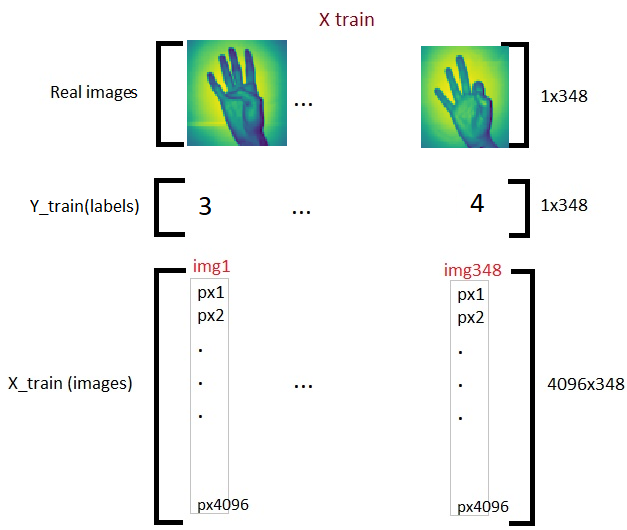

In [ ]:
x_train = X_train_flatten
x_test = X_test_flatten
y_train = Y_train
y_test = Y_test
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
test_accuracy = []
train_accuracy = []
test_accuracy_decent = []
index_decent =[]
index = []
from sklearn import linear_model
for i in range(150):
    logreg = linear_model.LogisticRegression(random_state = 42,max_iter= i )
    test_accuracy.append(logreg.fit(x_train, y_train).score(x_test, y_test))
    train_accuracy.append(logreg.fit(x_train, y_train).score(x_train, y_train))
    index.append(i)
    if i % 10 == 0:
        test_accuracy_decent.append(logreg.fit(x_train, y_train).score(x_test, y_test))
        index_decent.append(i)



plt.plot(index_decent,test_accuracy_decent)
plt.xticks(index_decent)
plt.xlabel("Number of Iterarion")
plt.ylabel("Test Accuracy")
plt.show()

As seen in the graph test accurcy is stable after approximatelly 100 iterations and peak accurcy is around after 15 iterations apx.

In [ ]:
print("Test Accurcy is : {}".format(max(test_accuracy_decent)))

<a is = "6"></a><br>
# K-Nearest Neighbour (KNN) Classification

* How KNN Algoritm works is very simple. Lets try to find the class of element C in the picture.
* If you select K=3, you will have 2 O and 1 A which are the three nearest neighbour of element C.
* So we decide the class of C is O.

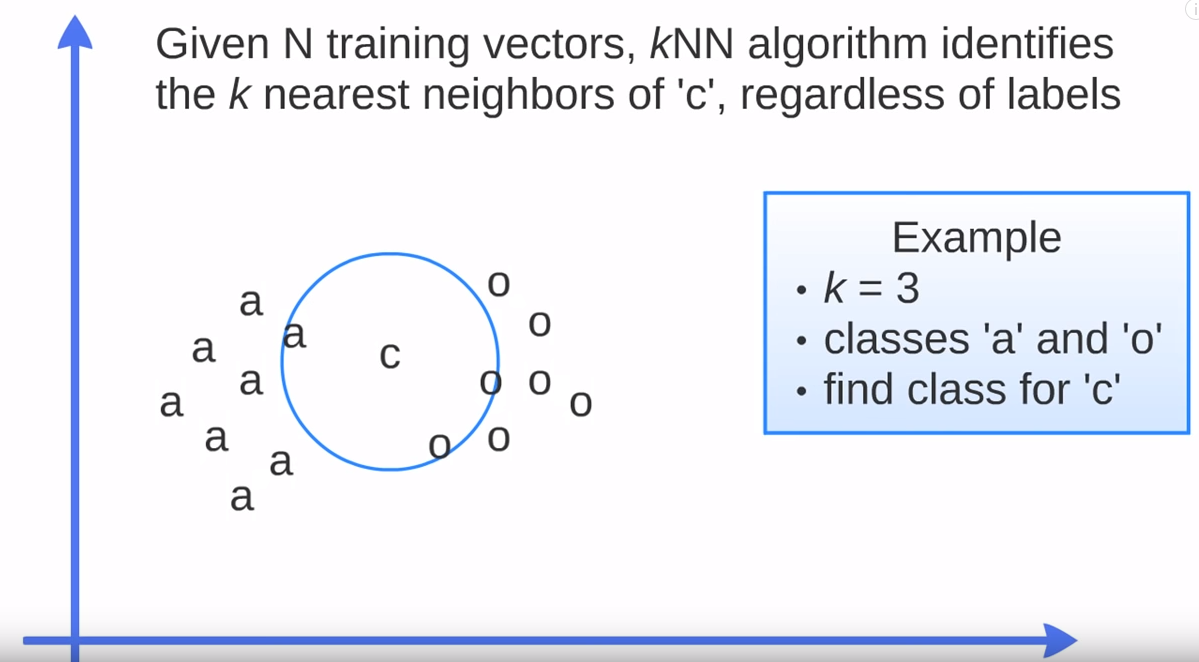

### Biomechanical features of orthopedic patients datase

* We are going to use Biomechanical features of orthopedic patients dataset to predict with KNN Algorithm.
* Class is the target variable and this target variable contains two types of strings which are "Normal" and "Abnormal".

In [ ]:
data = pd.read_csv("/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv")

In [ ]:
data.head()

In [ ]:
# We have 210 Abnormal and 100 Normal samples in the dataset.
data["class"].value_counts()

### Visualization of the dataset 

* Below graphics shows that when "degree_spondylolisthesis" feature is high than Abnormality is seen more often. 
* Almost all Normal sets has a very small "degree_spondylolisthesis" value.

In [ ]:
A = data[data["class"] == "Abnormal"]
N = data[data["class"] == "Normal"]
# scatter plot
plt.scatter(A.pelvic_incidence,A["degree_spondylolisthesis"],color="red",label="Abnormal",alpha= 0.3)
plt.scatter(N.pelvic_incidence,N["degree_spondylolisthesis"],color="green",label="Normal",alpha= 0.3)
plt.xlabel("pelvic_incidence")
plt.ylabel("degree_spondylolisthesis")
plt.legend()
plt.show()

#### Step 1: We have a target value which is class in this dataset. This target feature should be an integer value or categorical. So we do replace Abnormal status with 1 and Normal state with 0.

In [ ]:
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]

In [ ]:
data.head()

#### Step 2: After we have a numerical target feature we create our x and y sets.

In [ ]:
y = data["class"].values
x_data = data.drop(["class"],axis=1)

#### Step 3: If we do a normalization on x_data, we will not have any rule out x feature. It is wise to do a normalization.

In [ ]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

#### Step 4: Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

#### Step 5: KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} knn score: {} ".format(3,knn.score(x_test,y_test)))

#### Step 6: Find K value

In [ ]:
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

<a is = "7"></a><br>
# Support Vector Machine (SVM) Classification
Supervised learning: It uses data that has labels. Example, there are orthopedic patients data that have labels normal and abnormal.

* Biomechanical features of orthopedic patients datase
* We are going to use Biomechanical features of orthopedic patients dataset to predict with SVM.
* Class is the target variable and this target variable contains two types of strings which are "Normal" and "Abnormal".
* We already have the dataset from KNN study and normalization and Train-Test Split is already done.

In [ ]:
data.head()

In [ ]:
# SVM Classification
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train,y_train)
print("print accuracy of svm algo: ",svm.score(x_test,y_test))

<a is = "8"></a><br>
# Naive Bayes Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
print("print accuracy of naive bayes algo: ",nb.score(x_test,y_test))

<a is = "9"></a><br>
# Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("score: ", dt.score(x_test,y_test))

<a is = "10"></a><br>
# Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100,random_state = 1)
rf.fit(x_train,y_train)
print("random forest algo result: ",rf.score(x_test,y_test))

In [ ]:
score_rf = []
for each in range(1,100):
    rf2 = RandomForestClassifier(n_estimators = each,random_state = 1)
    rf2.fit(x_train,y_train)
    score_rf.append(rf2.score(x_test,y_test))
    
plt.plot(range(1,100),score_rf)
plt.xlabel("estimators")
plt.ylabel("accuracy")
plt.show()

In [ ]:
print('Random Forest max Accucancy is {}'.format(max(score_rf)))

In [ ]:
for i in range(len(score_rf)):
    if pd.DataFrame(score_rf).values[i] == max(pd.DataFrame(score_rf).values):
        print('Max Accuracy Estimater', i)